
---


The Business Case is 2-fold :

1. Segmentation: 

- Identify new user segmentation opportunities based on *__behavior data__* and your understanding of *__business challenges__* ;
- propose an approach to test the relevance of the segmentation 
- and how to implement it in the product


1. Plan To Improve
- Present a plan to improve (on your opinion) player matchmaking (= how Blitz decides who plays against whom),
- from proposing algorithm improvements to testing and implementing in the product


Instruction :

Deadline : 1 week

Format : 3 pages memo on Google Doc

---
---
# Segmenation tool - start
---

### Objective Assumption:
#### Our objective is to be able to segment users so that we can improve profit by improving seeing what differences paying users (payers) from non-paying users (non-payers). 


---
### >>>  VERY IMPORTANT ASSUMPTIONS !!! <<<
1) For a game to be monetizable: 'entry_credit_type' == 'DOLLAR' 
---

# Agenda:

1. Exploratory Data Analysis (EDA) + quality check
1. Feature Engineering
1. Pre-processing
1. Model Creation-Training
1. Evaluation
1. Results


---
---

# Imports

In [64]:
# Main imports
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Secondary Imports
import matplotlib.ticker as ticker
import polars.selectors as cs

In [2]:
#own functions
from visualizations import histo


In [3]:
pl.Config.set_tbl_cols(100)  
pl.Config.set_tbl_rows(30)

polars.config.Config

> Given the size of data  Polars librerary will be a better suit instead of Pandas.

# ETL

In [4]:
df = pl.read_parquet("Copy of Copy of blitz_case_study.parquet")
df.head(3)


user_id,game_id,match_type,entry_credit_type,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,started_at,total_players,match_rank,seconds_until_result
str,str,str,str,"decimal[25,4]",i64,f64,i32,datetime[ns],i32,i64,i64
"""grljjnB0W3TeQF4zbmYSgK8fje73""","""Domino""","""BRAWL""","""DOLLAR""",0.6000,300,0.0,null,2023-12-01 06:16:42,5,4,1256
"""i1bSrM2dhIQdnKkKRSi3SBF9PMS2""","""21Blitz""","""BRAWL""","""COIN""",null,50,null,120,2023-12-01 06:16:51,5,1,7753
"""ycv5gjeeA0OuzoSsToa2WEkYn3z2""","""Match3""","""BRAWL""","""COIN""",null,50,null,0,2023-12-01 06:16:58,5,4,109


In [5]:
df.to_pandas()[:100].to_csv('sample.csv',index=False)

In [6]:
df.shape

(15073046, 12)

# EDA

In [7]:
df.head(5)

user_id,game_id,match_type,entry_credit_type,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,started_at,total_players,match_rank,seconds_until_result
str,str,str,str,"decimal[25,4]",i64,f64,i32,datetime[ns],i32,i64,i64
"""grljjnB0W3TeQF4zbmYSgK8fje73""","""Domino""","""BRAWL""","""DOLLAR""",0.6000,300,0.0,null,2023-12-01 06:16:42,5,4,1256
"""i1bSrM2dhIQdnKkKRSi3SBF9PMS2""","""21Blitz""","""BRAWL""","""COIN""",null,50,null,120,2023-12-01 06:16:51,5,1,7753
"""ycv5gjeeA0OuzoSsToa2WEkYn3z2""","""Match3""","""BRAWL""","""COIN""",null,50,null,0,2023-12-01 06:16:58,5,4,109
"""TsjC0GcG20cnZh8kQr2vEKn390g2""","""Bingo""","""BRAWL""","""COIN""",null,120,null,160,2023-12-01 06:17:07,5,2,554
"""rnnyg31NzHWxpQNVt4O4TKwuHEn2""","""BallBlast""","""BRAWL""","""COIN""",null,50,null,30,2023-12-01 06:17:15,5,3,1074


In [8]:
categorical_cols = ["user_id","game_id","match_type","entry_credit_type"]
numerical_cols = ["entry_price_dollars","entry_price_coins","prize_dollars","prize_coins","total_players","match_rank","seconds_until_result"]
temporal_cols = ["started_at"]
target = None

#not missing any col, assert should be true
assert len(categorical_cols + numerical_cols + temporal_cols) == len( df.columns), 'There are missing cols'

In [9]:
#Quick look
for col in df.columns:
    unique_values = df.select(pl.col(col)).unique().to_series().to_list()
    unique_count = len(unique_values)
    print(col, "_"*(30-len(col)), " : unique count=> ", unique_count, " "*(7- int(len(str(unique_count)))),"| examples:", unique_values[:10])

user_id _______________________  : unique count=>  158009   | examples: ['gMrScQgwT9WCbxzylLi39GoGpjF3', 'ouaWngVHfzZOquM2h1mPIXxxzyz2', 'IxKV11bz1gSCPrdtuvGBmr8XHAW2', 'QHt6j4n4ZAgxiBYPKCKhWSnX7DB2', 'uvdw7ZGRC1PUALk8A5Xb1wW1LDf1', 'GHEzNTNTZZfLIbOaGaWssvghGTJ3', 'u5O9SPuwatW9K3KVUDIDBSgxv1w1', 'HYbfR1oXZ3T7EgcgA4s7PkWfSXh2', 'qcQjCNXfNbW69aolFgS6ayvWlbY2', 'kGb784qyhJQxza8VLLbcyW29Ypx1']
game_id _______________________  : unique count=>  17       | examples: ['PokerBlast', 'BallBlast', 'Match3', 'FindObjects', 'KlondikeSolitaire', 'Domino', 'Golf', 'TileMatch', '21Blitz', 'Pool']
match_type ____________________  : unique count=>  3        | examples: ['BRAWL', 'SPIN_AND_GO', 'ONE_VS_ONE']
entry_credit_type _____________  : unique count=>  2        | examples: ['DOLLAR', 'COIN']
entry_price_dollars ___________  : unique count=>  82       | examples: [Decimal('8.0000'), Decimal('0.8000'), Decimal('21.0000'), Decimal('80.0000'), Decimal('42.0000'), None, Decimal('25.0000'), Decimal('4.0

## Duplicates

In [10]:
df.filter(df.is_duplicated()).height

0

## Missing Values

In [11]:
for col in df.columns:
  print(f"{col} = {df[col].null_count()}")

user_id = 0
game_id = 0
match_type = 0
entry_credit_type = 0
entry_price_dollars = 10858070
entry_price_coins = 3656449
prize_dollars = 10780824
prize_coins = 4292238
started_at = 0
total_players = 0
match_rank = 0
seconds_until_result = 0


> No missing values

> No Duplicates

> The quality of the data seems to be ok.

## Adhoc Questions

In [12]:
# Masks

dollar_type = df['entry_credit_type'] == "DOLLAR"
coin_type = df['entry_credit_type'] == "COIN"

coin_entry = ~df['entry_price_coins'].is_null() # coin_entry_nul
coin_outcome = ~df['prize_coins'].is_null() # coin_prix_nul

dollar_entry = ~df['entry_price_dollars'].is_null() # coin_entry_nul
dollar_outcome = ~df['prize_dollars'].is_null() # coin_prix_nul

In [13]:
#Could there be a user  with NO coin entry and  prize coins?  -> YES,  dollar based
df.filter(~coin_entry &  ~coin_outcome ).head(2)
#df.filter(~coin_entry &  ~coin_outcome & coin_type).head(2) --> zero results, must have dollars


user_id,game_id,match_type,entry_credit_type,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,started_at,total_players,match_rank,seconds_until_result
str,str,str,str,"decimal[25,4]",i64,f64,i32,datetime[ns],i32,i64,i64
"""7DrKxjFc3jUwz2YZAlh2EfS52Op2""","""Match3""","""BRAWL""","""DOLLAR""",0.5000,null,1.3,null,2023-12-01 06:17:39,5,2,144
"""OiWrYu1lPEfgJtcGlFg6kGMwmay2""","""Pool""","""BRAWL""","""DOLLAR""",1.0000,null,1.3,null,2023-12-01 06:20:18,5,2,615


In [14]:
#Could there be a user entry with NO Dollar entry and  Dollar Prize ?  -> Yes (coin based)
df.filter(~dollar_entry & dollar_outcome ).head(3)

user_id,game_id,match_type,entry_credit_type,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,started_at,total_players,match_rank,seconds_until_result
str,str,str,str,"decimal[25,4]",i64,f64,i32,datetime[ns],i32,i64,i64
"""xT6TEDNOPlSFh80uzJG96zAhpEt2""","""Bingo""","""BRAWL""","""COIN""",null,1000,1.0,null,2023-12-01 06:25:26,10,1,316
"""i9dYe2n94JMihwzwwSWYoPHbyL83""","""KlondikeSolitaire""","""BRAWL""","""COIN""",null,1000,0.6,null,2023-12-01 06:26:53,10,2,128
"""GAPAV5yPO3VUaPhQViZYSem4jN32""","""GridBlocks""","""BRAWL""","""COIN""",null,1000,0.6,null,2023-12-01 06:27:36,10,2,129


In [15]:
df.filter(~dollar_entry & dollar_outcome )['match_type'].unique()

match_type
str
"""BRAWL"""


> So the company can have a loss, in the exchange of coins for dollars

## Variables 

### Temporal

#### Started_at 

In [16]:
df['started_at'].min(), df['started_at'].max(),

(datetime.datetime(2023, 12, 1, 0, 0),
 datetime.datetime(2023, 12, 31, 23, 59, 59))

### Categorical

#### User_id

In [17]:
print(f"unique users = {df['user_id'].n_unique()},  total rows = { df['user_id'].len()}")

unique users = 158009,  total rows = 15073046


In [18]:
df['user_id'].n_unique()/df['user_id'].len() * 100

1.0482884481345045

In [19]:
af = df.group_by('user_id').len().rename({"len": "games_played"})
af2 = af.group_by('games_played').len().rename({"len":'users'}).sort(by='users', descending = True)
total_users = af2['users'].sum()
af2 = af2.with_columns(
    (pl.col("users") / total_users * 100).round(3).alias("%_total")
)
af2 = af2.with_columns(
    (pl.col("users").cum_sum() / total_users * 100).round(2).alias("cumul_percent")
)

af2.head(5)

games_played,users,%_total,cumul_percent
u32,u32,f64,f64
1,18654,11.806,11.81
2,11764,7.445,19.25
3,8736,5.529,24.78
4,6955,4.402,29.18
5,5421,3.431,32.61


<Axes: >

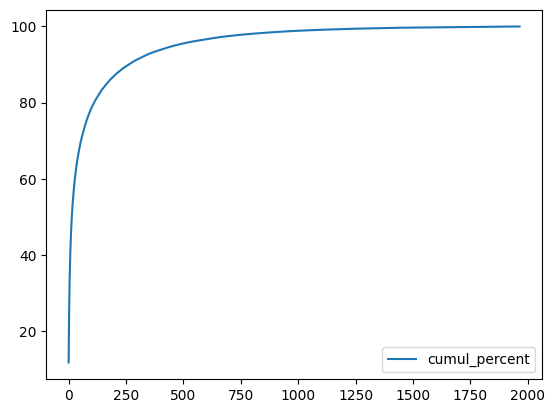

In [20]:
af2.select('cumul_percent').to_pandas().plot()

<Axes: >

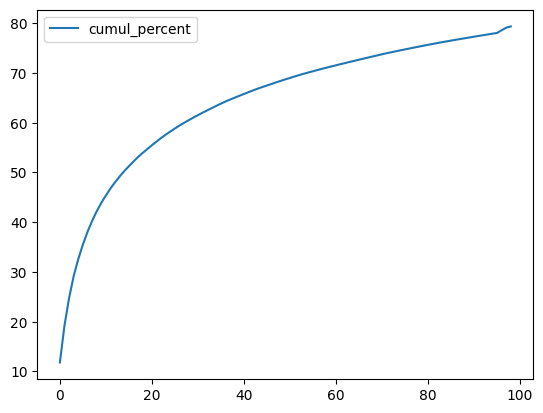

In [21]:
af2.filter(af2['games_played']< 100).select('cumul_percent').to_pandas().plot()

> Almost 1/4th of users dont play more than 3 games and 50% dont play more than 15 games 

> --> This could be due to the data size, the last arrivals dont have time enought to play more.


#### Game_id

In [22]:
df['game_id'].unique().len()

17

In [23]:
df.group_by('game_id').len().to_pandas()

,game_id,len
0,TileMatch,124
1,FindObjects,6038
2,Yatzy,520213
3,Domino,280493
4,Pool,969126
5,TripeaksSolitaire,378141
6,BallBlast,382282
7,21Blitz,394669
8,BubbleShooter,1070500
9,Golf,111092


/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


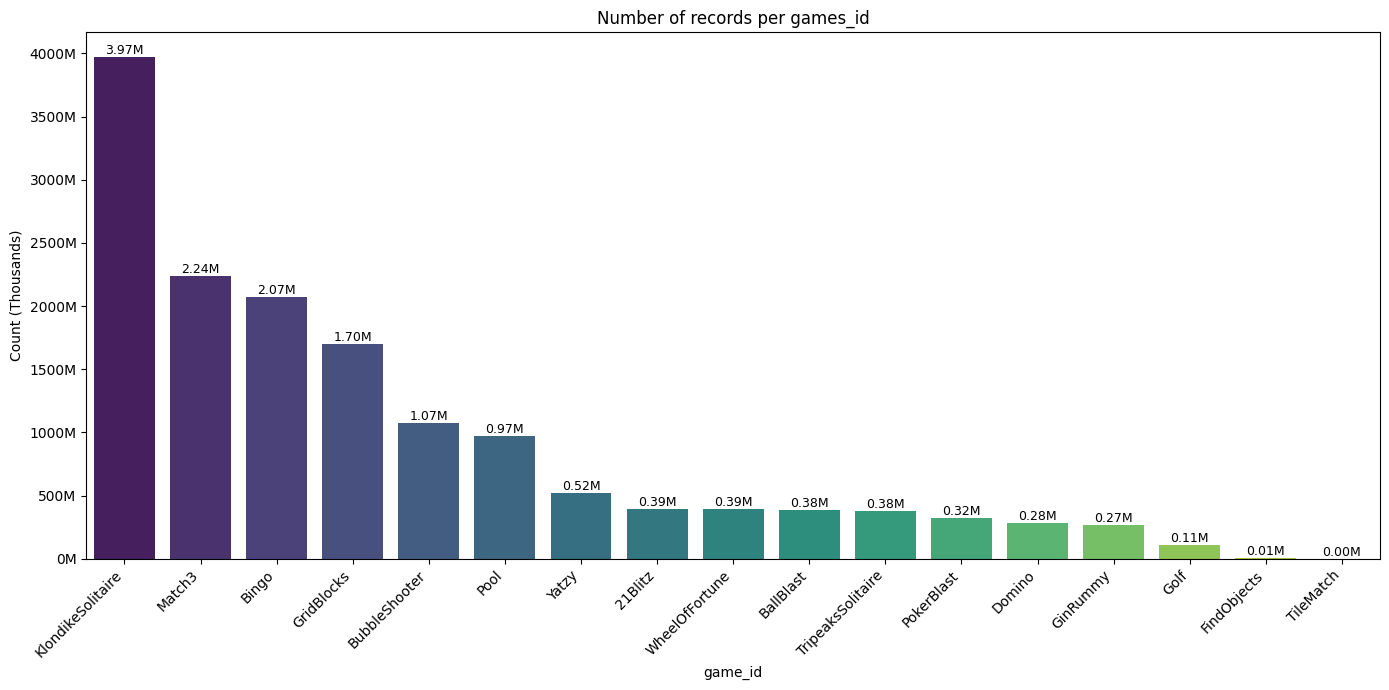

In [24]:
game_counts = df.group_by('game_id').len().to_pandas()
histo(game_counts,'game_id', title='Number of records per games_id',symbol='M')

/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


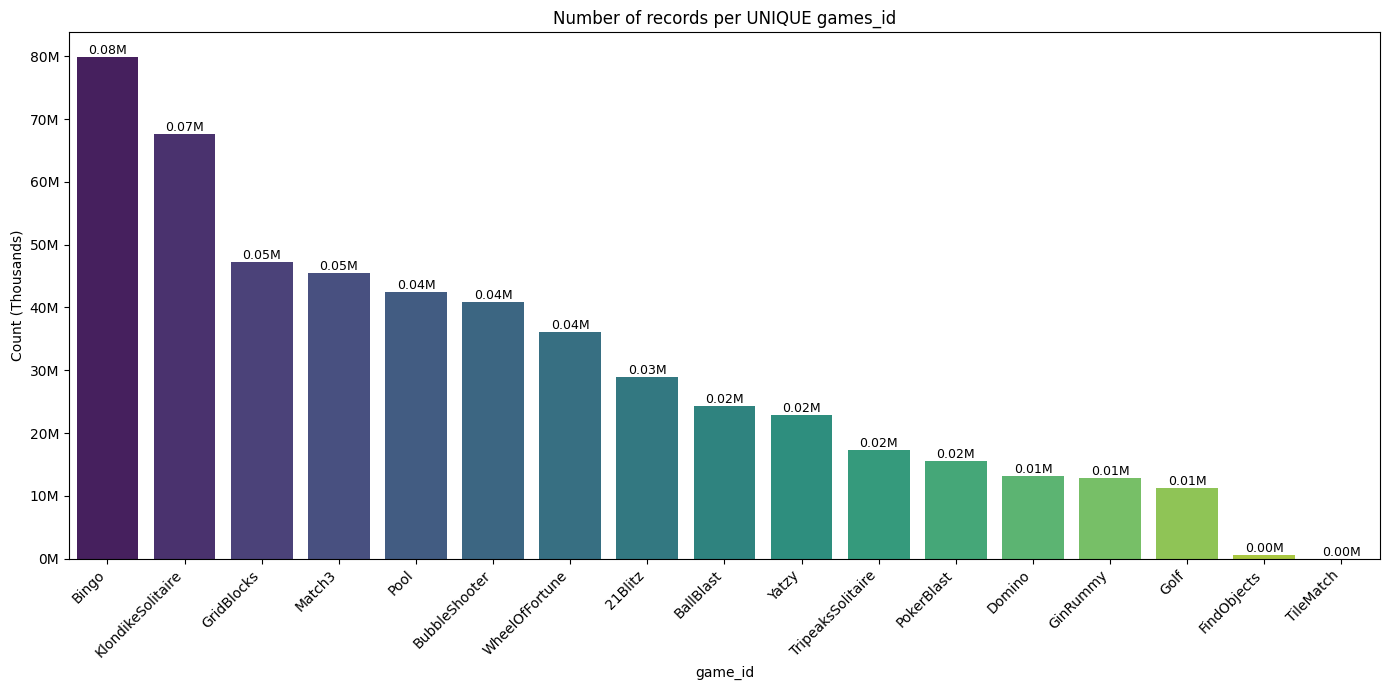

In [25]:
game_counts = df.group_by(['game_id']).agg(pl.n_unique('user_id').alias('count')).to_pandas()
histo(game_counts,'game_id', title='Number of records per UNIQUE games_id',symbol='M')

#### Match_type 

/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


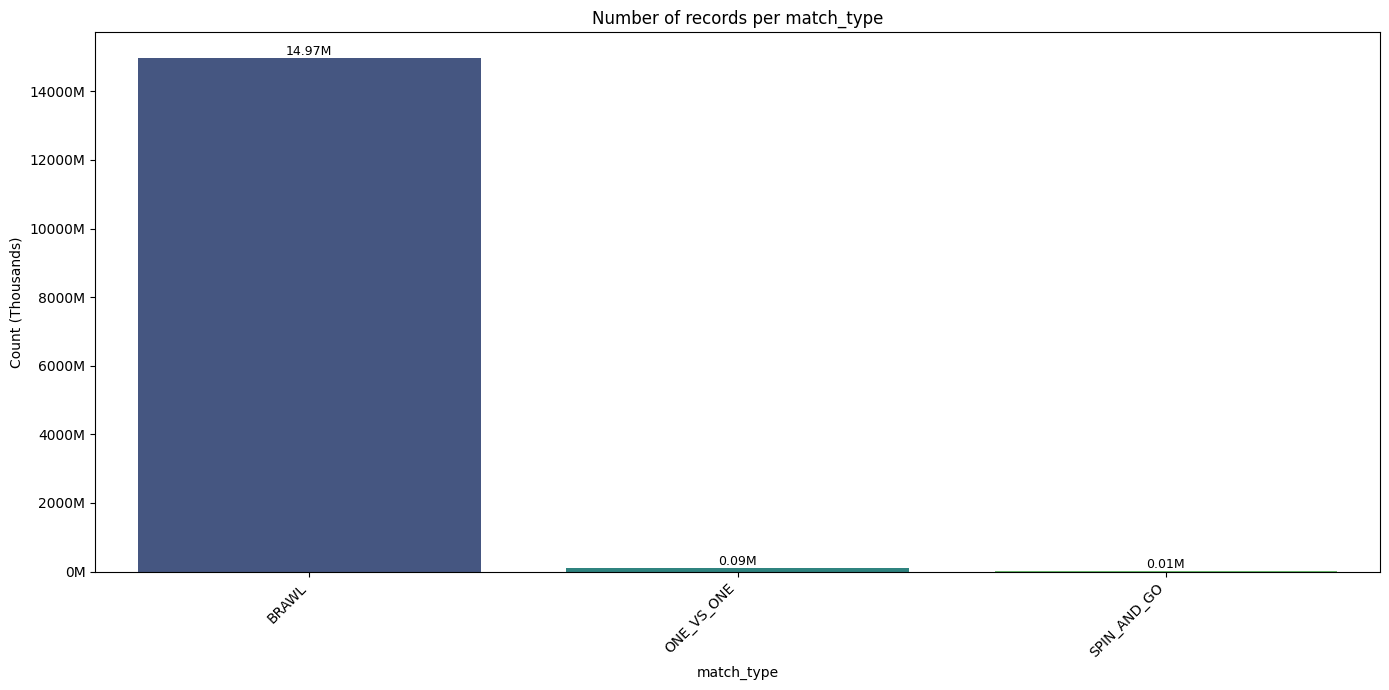

In [26]:
game_counts = df.group_by('match_type').len().to_pandas()
histo(game_counts,'match_type', title='Number of records per match_type',symbol='M')

> Clear preference

/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


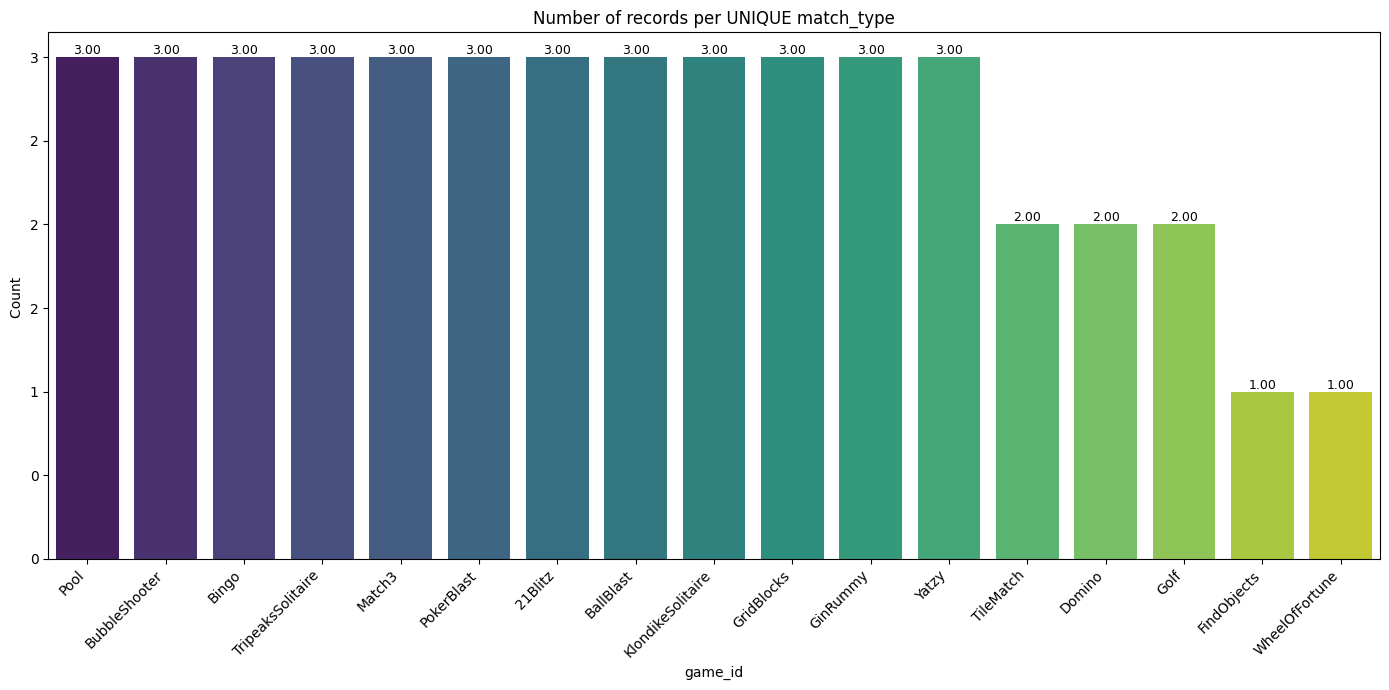

In [27]:
game_counts = df.group_by(['game_id']).agg(pl.n_unique('match_type').alias('count')).to_pandas()
histo(game_counts,'game_id', title='Number of records per UNIQUE match_type',symbol='None' )

> Not all games have all match types

#### Entry_credit_type

/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


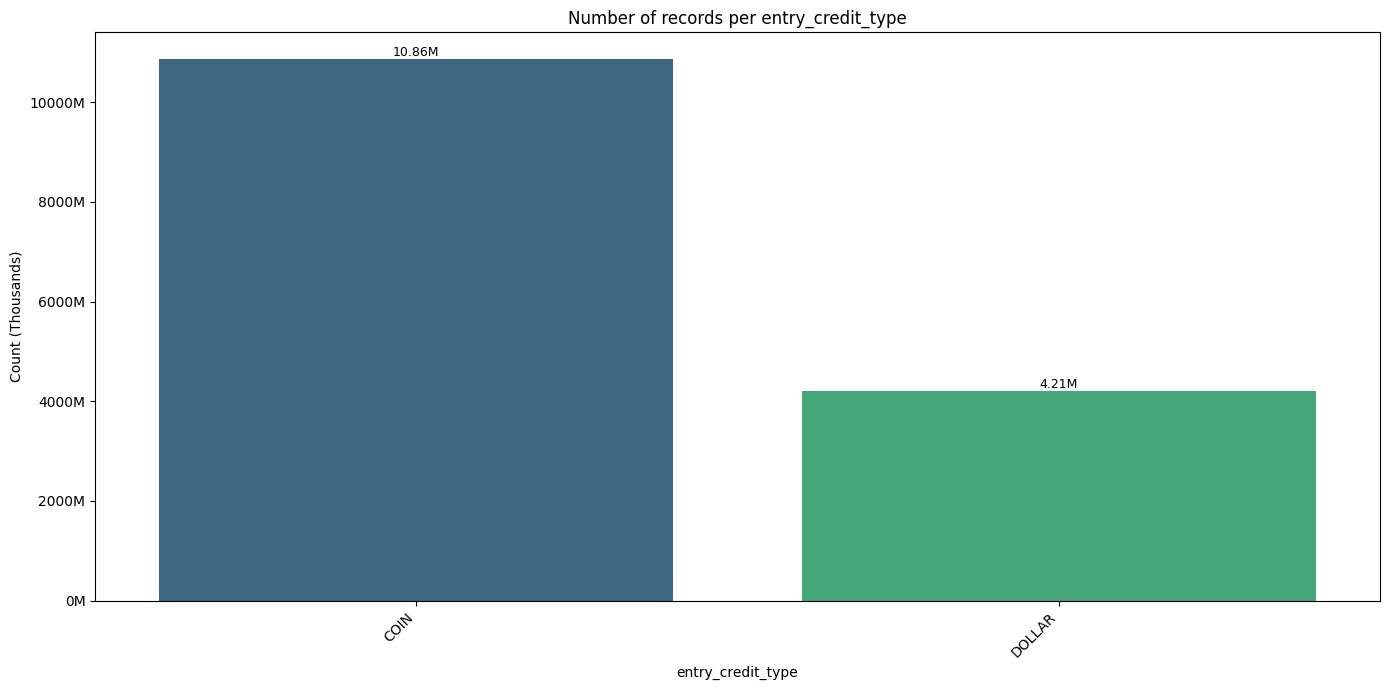

In [28]:
game_counts = df.group_by('entry_credit_type').len().to_pandas()
histo(game_counts,'entry_credit_type', title='Number of records per entry_credit_type',symbol='M')

/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


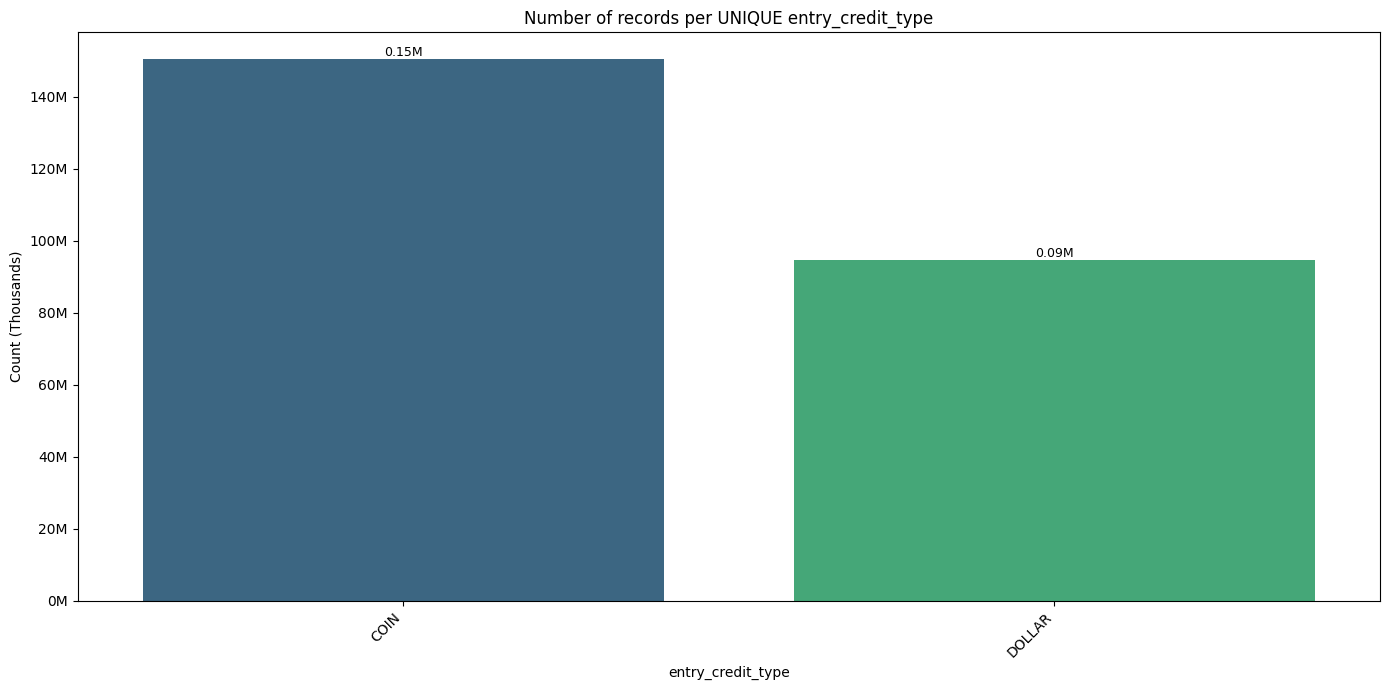

In [29]:
game_counts = df.group_by(['entry_credit_type']).agg(pl.n_unique('user_id').alias('count')).to_pandas()
histo(game_counts,'entry_credit_type', title='Number of records per UNIQUE entry_credit_type',symbol='M')

###  Numerical Variables

In [30]:
df[numerical_cols].describe()

statistic,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,total_players,match_rank,seconds_until_result
str,f64,f64,f64,f64,f64,f64,f64
"""count""",4.214976e6,1.1416597e7,4.292222e6,1.0780808e7,1.5073046e7,1.5073046e7,1.5073046e7
"""null_count""",1.085807e7,3.656449e6,1.0780824e7,4.292238e6,0.0,0.0,0.0
"""mean""",2.903107,94.448894,2.163375,48.065408,5.10198,3.024772,1064.238591
"""std""",6.570809,168.049672,7.66237,53.486798,0.814014,1.51042,5212.683145
"""min""",0.2,15.0,0.0,0.0,2.0,1.0,5.0
"""25%""",1.0,50.0,0.0,0.0,5.0,2.0,155.0
"""50%""",1.0,50.0,0.5,30.0,5.0,3.0,261.0
"""75%""",3.0,50.0,2.0,70.0,5.0,4.0,516.0
"""max""",150.0,1000.0,225.0,1000.0,10.0,10.0,403657.0


In [31]:
for var in numerical_cols:
    print(var, "= ",df[var].n_unique())

entry_price_dollars =  82
entry_price_coins =  12
prize_dollars =  126
prize_coins =  19
total_players =  3
match_rank =  10
seconds_until_result =  67800


#### Entry_price_dollars

In [32]:
# get the most used entry prices in dollars

af = (df.filter(~df['entry_price_dollars'].is_null())
   .group_by('user_id')
   .agg(pl.col('entry_price_dollars').mode().alias('mode_prices'))
   .explode('mode_prices')
   .rename({'mode_prices': 'entry_price_dollars'}))
af.head(9)

user_id,entry_price_dollars
str,"decimal[25,4]"
"""rlBuWGGpyPdjWynkIAqeoSechIG2""",5.0000
"""I16RlJArFveKBzt91DQacaPzljp1""",1.0000
"""AfRxKV1SkCQp7KFAF7ykWw2W5Ko2""",0.6000
"""MJYZ63I2IiVOJKYsafTD0cDYCr93""",3.0000
"""PpDKWcjioaRFy1JsILWM8oyoWe82""",0.6000
"""JCGD8xNm8SPiopBiSErbWXCXFpz1""",5.0000
"""BrKRJIhNyEbqnWCPz1lwrfAMGBx2""",3.0000
"""AEPicy5k4hfJBeEQa8pMVhxvqwj1""",1.0000
"""z5ZEnu5wSaeHAoNJYkwEpGFXQ6U2""",1.0000


/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


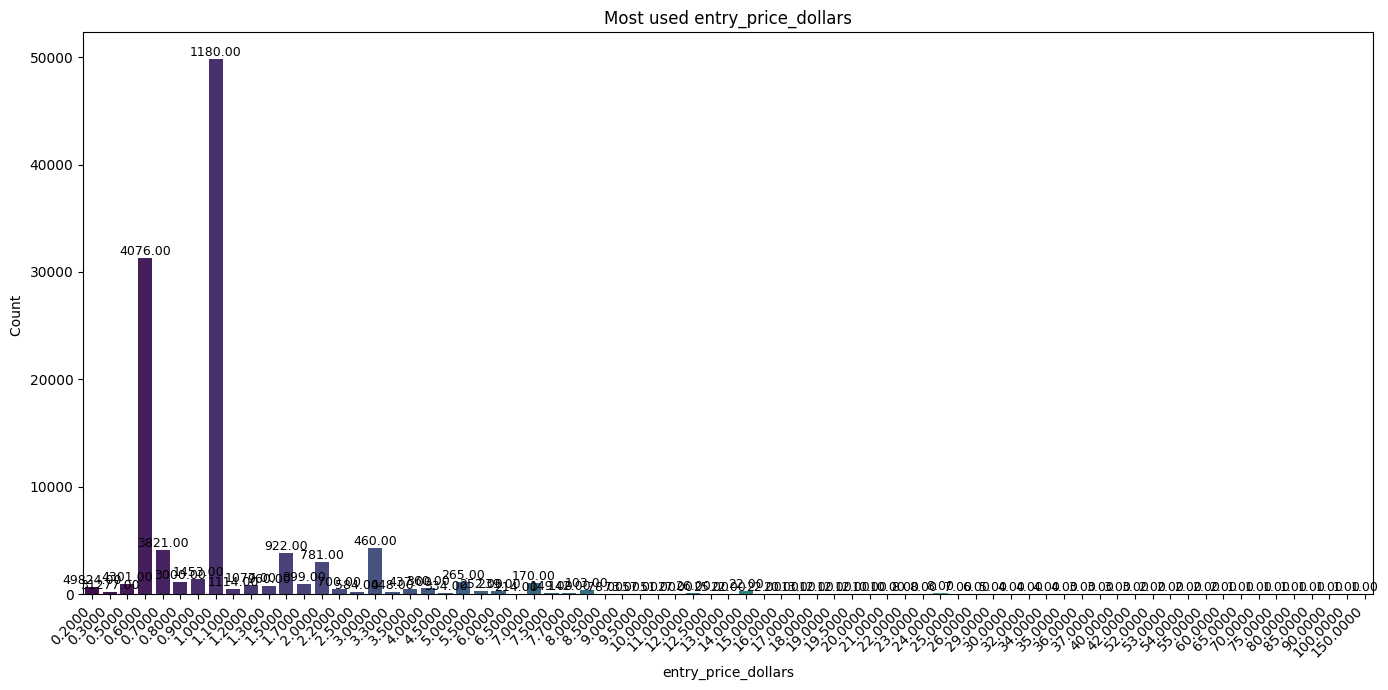

In [33]:
game_counts = af.group_by('entry_price_dollars').len().to_pandas()
histo(game_counts,'entry_price_dollars', title='Most used entry_price_dollars',symbol='D')

/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


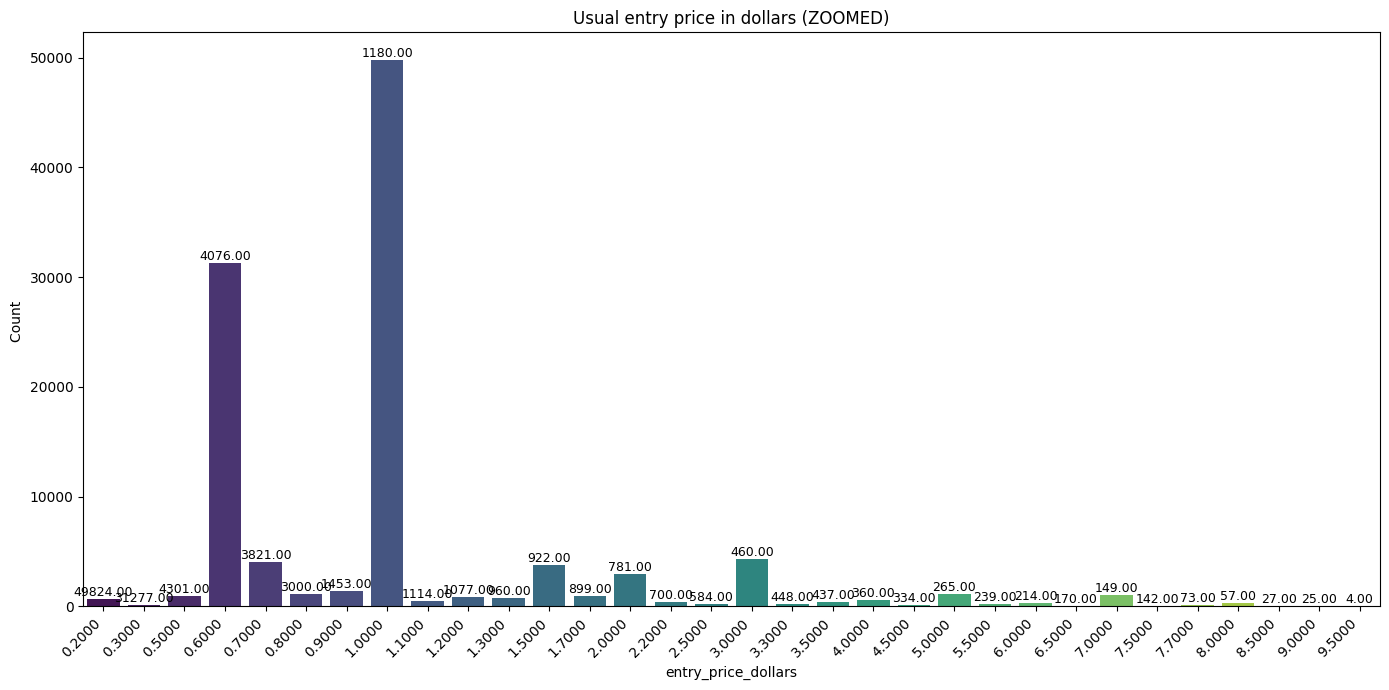

In [34]:
game_counts = af.group_by('entry_price_dollars').len().to_pandas()
game_counts = game_counts[game_counts.entry_price_dollars < 10]
histo(game_counts,'entry_price_dollars', title='Usual entry price in dollars (ZOOMED)',symbol='D')

> The usual betting for majority of users is less than 3 dolars per game.

#### Entry_price_coins

In [35]:
af = (df.filter(~df['entry_price_coins'].is_null())
   .group_by('user_id')
   .agg(pl.col('entry_price_coins').mode().alias('mode_prices'))
   .explode('mode_prices')
   .rename({'mode_prices': 'entry_price_coins'}))
af.head(9)


user_id,entry_price_coins
str,i64
"""34Uo7LZy3GX6U6ZdLdZMMy9XFCf2""",1000
"""ET8rPgjEr4aatSZ3qYlz6gtZ9b23""",60
"""k5AXXDKGYQR43rJciegQwWJ2Oyr1""",50
"""LeYbsRi9wSO3uhuvBIBzfAJ4pzo1""",300
"""gLN83GC3LcPmZTGh5lfzckogjO82""",300
"""jwgq7d7tdpNabUnolSgv0H0zvHr1""",50
"""SJmGM1c65oRFpkO6e3vOeCOUPjH3""",1000
"""pQ8sUT0VTbeaLIOZZSbosdsHfAe2""",50
"""7lELDMlsjvT5Zb4NHCcDlkiwwSt2""",50


/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


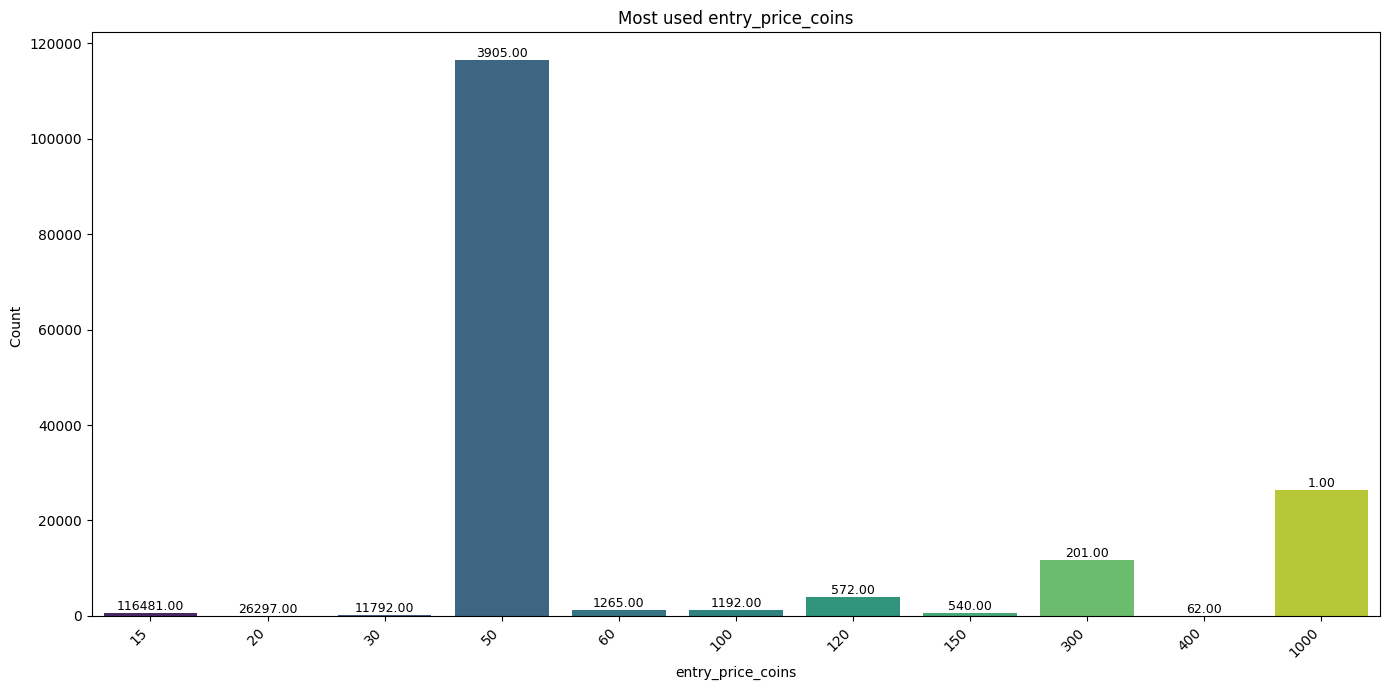

In [36]:
game_counts = af.group_by('entry_price_coins').len().to_pandas()
histo(game_counts,'entry_price_coins', title='Most used entry_price_coins',symbol='D')

#### Prize_dollars 

In [37]:
df.filter(df['prize_dollars']>0).head(4)

user_id,game_id,match_type,entry_credit_type,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,started_at,total_players,match_rank,seconds_until_result
str,str,str,str,"decimal[25,4]",i64,f64,i32,datetime[ns],i32,i64,i64
"""7DrKxjFc3jUwz2YZAlh2EfS52Op2""","""Match3""","""BRAWL""","""DOLLAR""",0.5000,null,1.3,null,2023-12-01 06:17:39,5,2,144
"""OiWrYu1lPEfgJtcGlFg6kGMwmay2""","""Pool""","""BRAWL""","""DOLLAR""",1.0000,null,1.3,null,2023-12-01 06:20:18,5,2,615
"""mVQEHmXdQGNjfmyimExXMYja86R2""","""Match3""","""BRAWL""","""DOLLAR""",0.5000,null,3.0,null,2023-12-01 06:20:22,5,1,122
"""wvctfgGAf2XOGZmEs4eq8zCBw2J3""","""Match3""","""BRAWL""","""DOLLAR""",1.0000,null,0.5,null,2023-12-01 06:22:11,5,3,142


<Axes: >

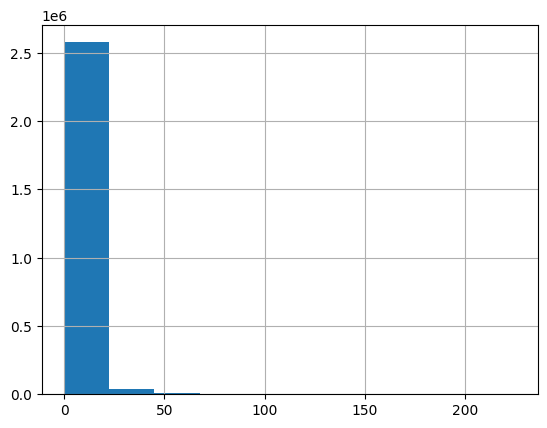

In [38]:
df.filter(df['prize_dollars']>0)['prize_dollars'].to_pandas().hist(bins=10)


/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


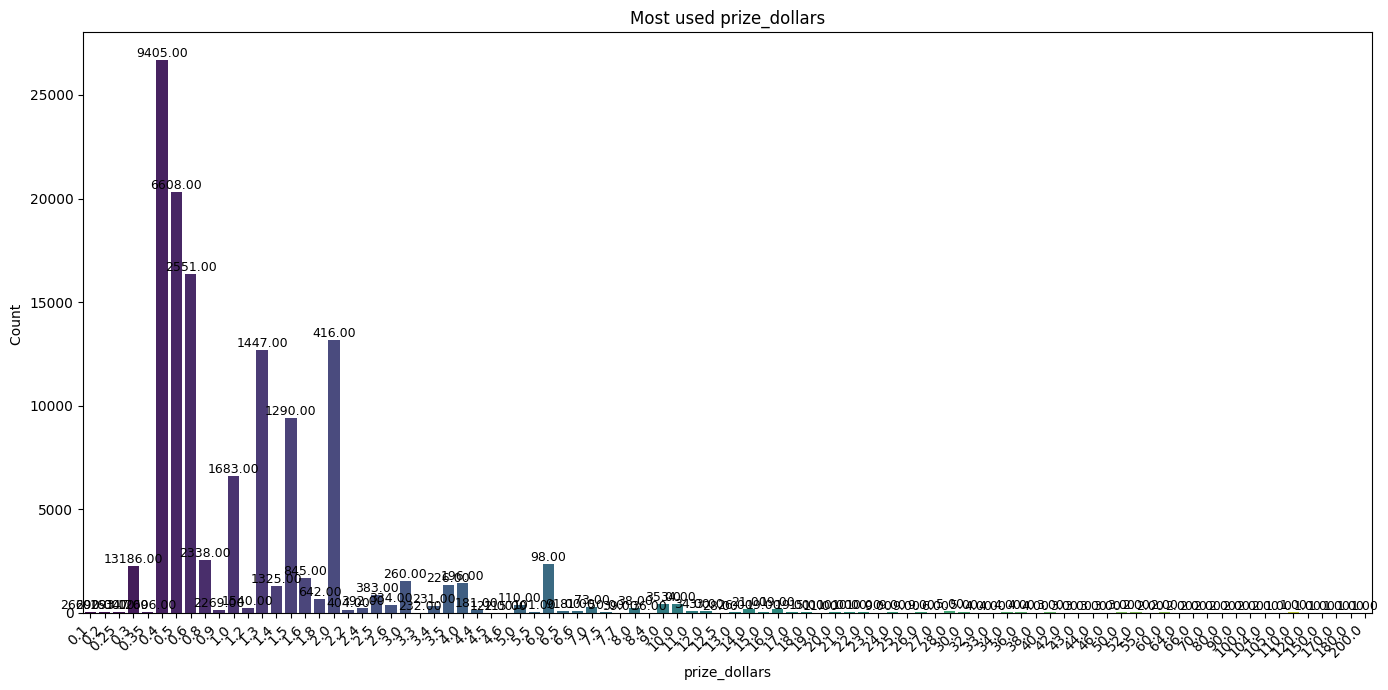

In [39]:
af = (df.filter(df['prize_dollars'] > 0)
   .group_by('user_id')
   .agg(pl.col('prize_dollars').mode().alias('mode_prices'))
   .explode('mode_prices')
   .rename({'mode_prices': 'prize_dollars'}))
af.head(9)

game_counts = af.group_by('prize_dollars').len().to_pandas()
histo(game_counts,'prize_dollars', title='Most used prize_dollars',symbol='D')


#### Prize_coins

<Axes: >

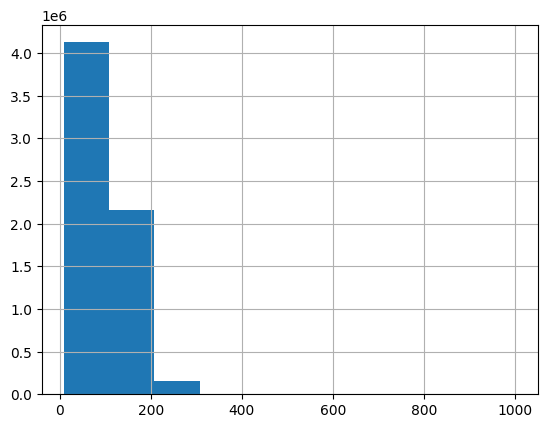

In [40]:
df.filter(df['prize_coins']>0)['prize_coins'].to_pandas().hist(bins=10)


/Users/i0557807/01 Data-Science/19 voodoo/visualizations.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col_name, y='count', data=df, palette='viridis')


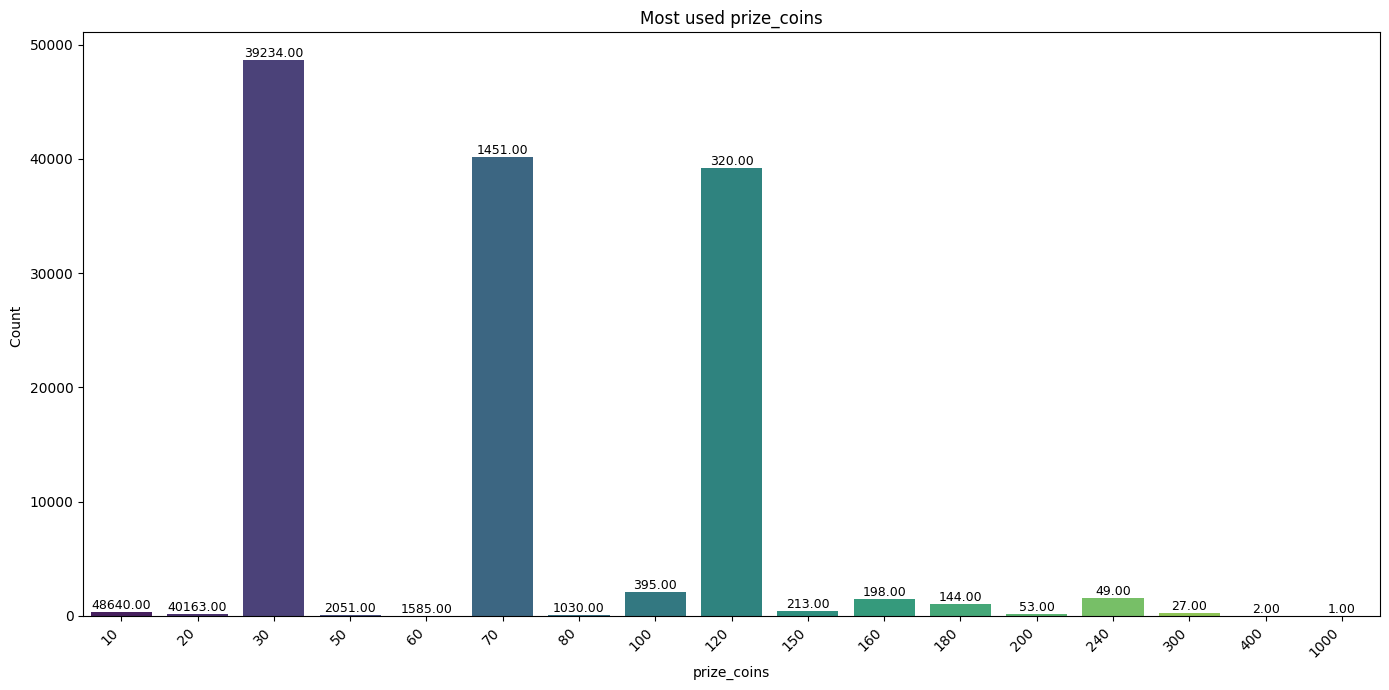

In [41]:
af = (df.filter(df['prize_coins'] > 0)
   .group_by('user_id')
   .agg(pl.col('prize_coins').mode().alias('mode_prices'))
   .explode('mode_prices')
   .rename({'mode_prices': 'prize_coins'}))
af.head(9)

game_counts = af.group_by('prize_coins').len().to_pandas()
histo(game_counts,'prize_coins', title='Most used prize_coins',symbol='D')


#### Total_players

<Axes: >

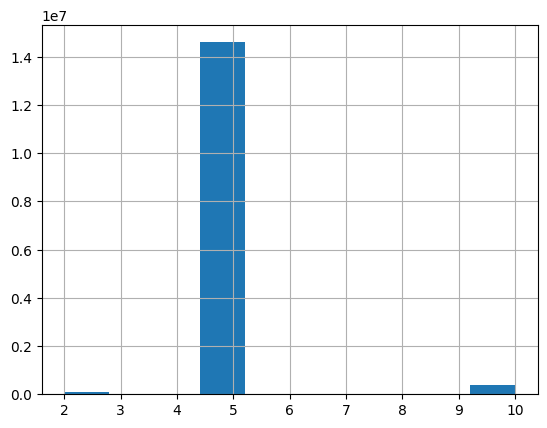

In [42]:
df.filter(df['total_players']>0)['total_players'].to_pandas().hist(bins=10)


## Adhoc Questions

### 1. When does a user start putting real money? (first dollar entry_credit_type)

In [43]:
#order
sorted_df = df.sort(["user_id", "started_at"], descending=[False, False])
sorted_df = sorted_df.with_columns(
    pl.when(pl.col("seconds_until_result") > 0)
      .then(1)
      .otherwise(0)
      .alias("is_completed"),
)


In [44]:
sorted_df = sorted_df.with_columns(
   pl.col('is_completed')
      .cum_sum()
      .over(['user_id'])
      .alias("game_number")
 )

sorted_df = sorted_df.with_columns(
    pl.when((pl.col("is_completed") == 1) & (pl.col("entry_credit_type") == "DOLLAR"))
    .then(1)
    .otherwise(0)
    .alias("completed_dollar_game")
)

first_dollar_games = (
    sorted_df
    .filter(pl.col("completed_dollar_game") == 1)
    .group_by("user_id")
    .agg(pl.min("game_number").alias("first_dollar_game_number"))
)
 
sorted_df = sorted_df.join(
    first_dollar_games,
    on="user_id",
    how="left"
)

# adding day difference
sorted_df = sorted_df.with_columns(
    pl.col("started_at") 
    .min()
    .over("user_id")
    .alias("first_game_date")
)


sorted_df = sorted_df.with_columns(
    (pl.col("started_at") - pl.col("first_game_date"))
    .dt.total_days()
    .floor()
    .cast(pl.Int64).alias("days_since_first_game")
)

  

In [45]:
# proof first_dollar_game_number works well
# user = 'JbAAfDVPSIdl0Xjr5lCk6V7A7nr1'
# sorted_df.filter(sorted_df['user_id'] == user).tail(30)

In [46]:
# # proof 2 - first_dollar_game_number works well
# user = '00KzUpFRyBMkNy3JQhIVbPRTLqy1'
# sorted_df.filter(sorted_df['user_id'] == user).head(30)

In [47]:
# How many days per user until played a DOLLAR entry credit type game
first_dollar_game_number_per_user = sorted_df.group_by('user_id')\
    .agg(pl.col('first_dollar_game_number')
    .min())
first_dollar_game_number_per_user.head(3)


user_id,first_dollar_game_number
str,i32
"""000IdEMSNCZrJrP5KI7P1JhpLuy2""",null
"""000eyKdzIUPjGcFzby3nS93Fehq2""",1
"""0017fygxbAZdmCma7tH3TrcXlpz2""",null


array([[<Axes: title={'center': 'first_dollar_game_number'}>]],
      dtype=object)

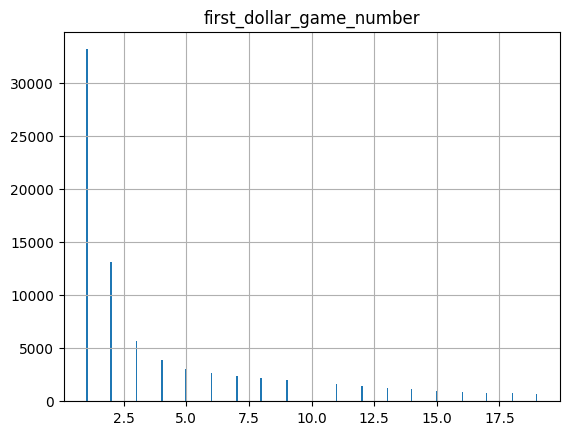

In [48]:
#show only non null users with less than 20 days
first_dollar_game_number_per_user.filter(\
  (~first_dollar_game_number_per_user['first_dollar_game_number'].is_null())\
    & (first_dollar_game_number_per_user['first_dollar_game_number'] <20))\
      .to_pandas().hist(bins=300)

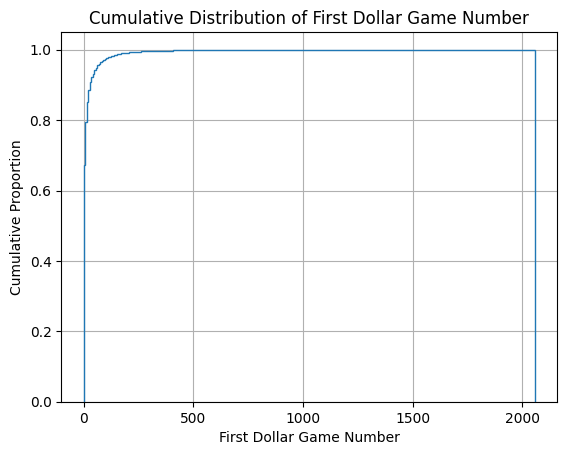

In [49]:
#show only non null users with cumulatative curb

filtered = first_dollar_game_number_per_user.filter(
    (~first_dollar_game_number_per_user['first_dollar_game_number'].is_null()) 

).to_pandas()


filtered['first_dollar_game_number'].hist(
    bins=300, 
    cumulative=True, 
    density=True,
    histtype='step'
)
plt.xlabel('First Dollar Game Number')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Distribution of First Dollar Game Number')
plt.show()

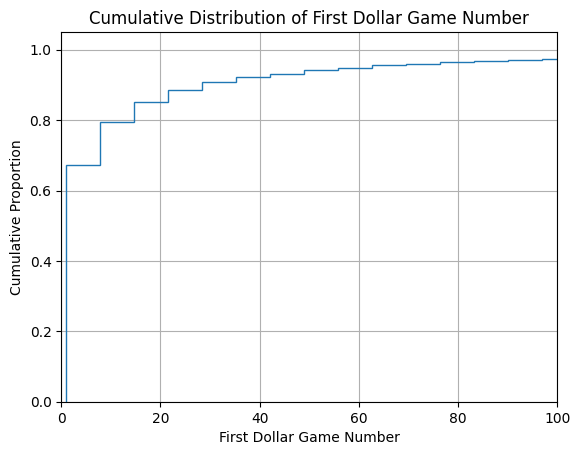

In [50]:
# Make a zoom to 100 max games
filtered = first_dollar_game_number_per_user.filter(
    (~first_dollar_game_number_per_user['first_dollar_game_number'].is_null()) 

).to_pandas()


filtered['first_dollar_game_number'].hist(
    bins=300, 
    cumulative=True, 
    density=True,
    histtype='step'
)
plt.xlabel('First Dollar Game Number')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Distribution of First Dollar Game Number')
# For Zoom
plt.xlim(0, 100)


plt.show()

> If the users are going to become dollar gamblers, 40 games should be enough for the majority.

### 2. How many days does this represents on avg? 

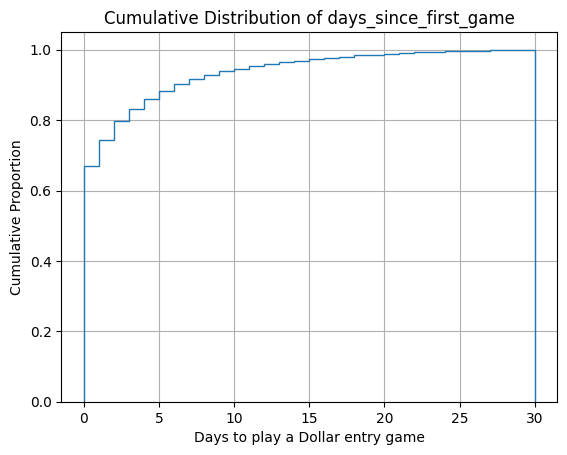

In [51]:
# Get the day when they started playing with Dollars since first day played.
days_since_first_game_per_user = sorted_df\
    .filter(sorted_df['game_number'] == sorted_df['first_dollar_game_number'])\
        .group_by('user_id')\
            .agg(pl.col('days_since_first_game')\
                .min())
aux = days_since_first_game_per_user.to_pandas()

aux['days_since_first_game'].hist(
    bins=300, 
    cumulative=True, 
    density=True,
    histtype='step'
)
plt.xlabel('Days to play a Dollar entry game')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Distribution of days_since_first_game')
plt.show()


> By day 5 most users will already be playing a Dollar game, and by day 20 almost everyone.

> We will use these features (first_dollar_game_number_per_user and days_since_first_game_per_user ) in Feature Engineering.

# Feature Engineering


> We are going to segment users aiming to study monetization.

> Our objective is to improve profit by improving the quality of our users.

> Meaning: we want to know the __**behaviours**__ that make a user use DOLLARS as entry_credit_type. We call this type of users 'PAYERS'

> Furthermore, we ALSO want to know the opposite behavior, the NON PAYERS

#### TO DO:
1) Mark players who had and had NOT betted at least one game (payers / non-payers classification )
1) Mark players who probably didnt have enough time to bet (30 days) and take them out of the study (30Days_to_play).
1) Summarize per user, in one row, as much knowledge on behaviour that we can from the data we posses (feature engineering).


In [52]:
df.head(3)

user_id,game_id,match_type,entry_credit_type,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,started_at,total_players,match_rank,seconds_until_result
str,str,str,str,"decimal[25,4]",i64,f64,i32,datetime[ns],i32,i64,i64
"""grljjnB0W3TeQF4zbmYSgK8fje73""","""Domino""","""BRAWL""","""DOLLAR""",0.6000,300,0.0,null,2023-12-01 06:16:42,5,4,1256
"""i1bSrM2dhIQdnKkKRSi3SBF9PMS2""","""21Blitz""","""BRAWL""","""COIN""",null,50,null,120,2023-12-01 06:16:51,5,1,7753
"""ycv5gjeeA0OuzoSsToa2WEkYn3z2""","""Match3""","""BRAWL""","""COIN""",null,50,null,0,2023-12-01 06:16:58,5,4,109


### Label payers / non-payers classification

In [57]:
df_pre_eng = df.join(first_dollar_game_number_per_user, on="user_id", how="left")

df_pre_eng = df_pre_eng.with_columns(
    pl.when(pl.col("first_dollar_game_number")>0)
    .then(1)
    .otherwise(0)
    .alias("is_payer")
)
df_pre_eng.head(2)

user_id,game_id,match_type,entry_credit_type,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,started_at,total_players,match_rank,seconds_until_result,first_dollar_game_number,is_payer
str,str,str,str,"decimal[25,4]",i64,f64,i32,datetime[ns],i32,i64,i64,i32,i32
"""grljjnB0W3TeQF4zbmYSgK8fje73""","""Domino""","""BRAWL""","""DOLLAR""",0.6000,300,0.0,null,2023-12-01 06:16:42,5,4,1256,1,1
"""i1bSrM2dhIQdnKkKRSi3SBF9PMS2""","""21Blitz""","""BRAWL""","""COIN""",null,50,null,120,2023-12-01 06:16:51,5,1,7753,7,1


###  Label 30Days_to_play

In [56]:
# BOOL Markers

#Player had enough days to become payer
DataBase_last_day = df['started_at'].max()

df_pre_eng = df_pre_eng.with_columns(
    pl.when(pl.col("started_at") < DataBase_last_day - pl.duration(days=30))
    .then(1)
    .otherwise(0)
    .alias("had_30Days_to_play")
)


df_pre_eng = df_pre_eng.with_columns(
    pl.col("had_30Days_to_play")\
        .max()\
        .over("user_id").alias("had_30Days_to_play")
)

df_pre_eng.head(3)

user_id,game_id,match_type,entry_credit_type,entry_price_dollars,entry_price_coins,prize_dollars,prize_coins,started_at,total_players,match_rank,seconds_until_result,first_dollar_game_number,is_payer,had_30Days_to_play
str,str,str,str,"decimal[25,4]",i64,f64,i32,datetime[ns],i32,i64,i64,i32,i32,i32
"""grljjnB0W3TeQF4zbmYSgK8fje73""","""Domino""","""BRAWL""","""DOLLAR""",0.6000,300,0.0,null,2023-12-01 06:16:42,5,4,1256,1,1,1
"""i1bSrM2dhIQdnKkKRSi3SBF9PMS2""","""21Blitz""","""BRAWL""","""COIN""",null,50,null,120,2023-12-01 06:16:51,5,1,7753,7,1,1
"""ycv5gjeeA0OuzoSsToa2WEkYn3z2""","""Match3""","""BRAWL""","""COIN""",null,50,null,0,2023-12-01 06:16:58,5,4,109,1,1,1


## Fact Features
 Here we add all the BEHAVIORAL features we can use.

In [58]:
#games completed

df_pre_eng = df_pre_eng.with_columns(
    pl.when(pl.col("seconds_until_result") > 0)
      .then(1)
      .otherwise(0)
      .alias("game_is_completed"))
df_pre_eng.head(2)


In [73]:

#Select dummy cols
cols_to_dummy = ["game_id","match_type","entry_credit_type"]

#list of cols to keep
cols_to_keep = ['user_id']

for col in cols_to_dummy:
  cols_to_keep = cols_to_keep +[ col+"_"+dummy_col for dummy_col in df[col].unique().to_list()]

# Create all dummies
all_dummies = df.to_dummies(cs.by_name(["game_id","match_type","entry_credit_type"]))

#keep only necessary
all_dummies = all_dummies[cols_to_keep]
all_dummies.head(2)

user_id,game_id_21Blitz,game_id_PokerBlast,game_id_Match3,game_id_Bingo,game_id_BallBlast,game_id_GinRummy,game_id_Yatzy,game_id_BubbleShooter,game_id_TripeaksSolitaire,game_id_WheelOfFortune,game_id_FindObjects,game_id_GridBlocks,game_id_TileMatch,game_id_Golf,game_id_Domino,game_id_Pool,game_id_KlondikeSolitaire,match_type_SPIN_AND_GO,match_type_BRAWL,match_type_ONE_VS_ONE,entry_credit_type_DOLLAR,entry_credit_type_COIN
str,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
"""grljjnB0W3TeQF4zbmYSgK8fje73""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
"""i1bSrM2dhIQdnKkKRSi3SBF9PMS2""",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [79]:
# Ensure all dummies are present

assert len( df_pre_eng['game_id'].unique().to_list() + df_pre_eng['match_type'].unique().to_list() + df_pre_eng['entry_credit_type'].unique().to_list() + ['user_id']) == len(all_dummies.columns)

In [ ]:
user_behavior_features = (
    df_pre_eng.group_by("user_id")
    .agg(

        # Game Usage
        pl.col("player_had_30Days_to_play_at_least").max().alias("had_30Days_to_play"),
        pl.col("game_is_completed").cum_sum().over("user_id").alias("completed_games_count"),
        pl.col("game_is_completed").sum().alias("total_played_games"),
        pl.col("seconds_until_result").mean().alias("avg_game_duration"),
        pl.col("seconds_until_result").std().alias("game_duration_std"),
        pl.col("game_id").mode().first().alias("most_played_game_id"),
        pl.col("match_type").mode().first().alias("most_played_match_type"),
        

        #Spendature
            #dollars
        pl.col("entry_price_dollars").mean().alias("avg_entry_dollars"),
        pl.col("entry_price_dollars").sum().alias("total_spend_dollars"),
        pl.col("entry_price_dollars").std().alias("spend_dollars_std"),
        pl.col("prize_dollars").sum().alias("total_prize_dollars"),
            #coin
        pl.col("entry_price_coins").mean().alias("avg_entry_coins"),
        pl.col("entry_price_coins").sum().alias("total_spend_coins"),
        pl.col("entry_price_coins").std().alias("spend_coins_std"),
        pl.col("prize_coins").sum().alias("total_prize_coins"),
        
        # Game outcome
        pl.len().alias("match_count"),
        pl.col("match_rank").mean().alias("avg_rank"),
        pl.col("match_rank").min().alias("best_rank"),
        pl.col("match_rank").max().alias("worst_rank"),
        

        # Time patterns
        pl.col("started_at").dt.hour().mode().first().alias("most_played_hour"),
        (pl.col("started_at").dt.hour().is_between(0, 5, closed="both")).mean().alias("night_matches"),
        (pl.col("started_at").dt.hour().is_between(6, 11, closed="both")).mean().alias("morning_matches"),
        (pl.col("started_at").dt.hour().is_between(12, 17, closed="both")).mean().alias("afternoon_matches"),
        (pl.col("started_at").dt.hour().is_between(18, 23, closed="both")).mean().alias("evening_matches"),
        pl.col("started_at").dt.weekday().mode().first().alias("most_played_weekday"),
        (pl.col("started_at").dt.weekday().is_in([0, 1, 2, 3, 4])).mean().alias("weekday_user"),
        (pl.col("started_at").dt.weekday().is_in([5, 6])).mean().alias("weekend_user"),
        
        pl.col("total_players").mean().alias("avg_players_per_match"),
        
        # Win metrics
        (pl.col("match_rank") == 1).sum().alias("first_place_count"),
        (pl.col("match_rank") <= 3).sum().alias("top_three_count"),
        (pl.col("match_rank") >3).sum().alias("loss_count"), #this can be taken out
        
        # Game type behavior
        pl.col("match_type").n_unique().alias("match_type_variety_exposure"),

        # Paid matches
        pl.col("entry_price_dollars").filter(pl.col("entry_price_dollars") > 0).len().alias("paid_match_count"),
    )
)

## Composed features (metrics)

In [ ]:
user_behavior_features = user_behavior_features.with_columns([
    # Net profit/loss
    (pl.col("total_prize_dollars") - pl.col("total_spend_dollars")).alias("net_dollar_profit"),
    (pl.col("total_prize_coins") - pl.col("total_spend_coins")).alias("net_coin_profit"),
    
    # Performance metrics
    (pl.col("first_place_count") / pl.col("match_count")).alias("win_rate"),
    (pl.col("top_three_count") / pl.col("match_count")).alias("top_three_rate"),
    
    # Monetization behavior
    (pl.col("paid_match_count") / pl.col("match_count")).alias("paid_game_ratio"),
])

In [ ]:
user_behavior_features.head(3)

## Merge user_features

In [ ]:
### Previously Calculated Facts

# This tells at which game did the player used DOLLAR as entry_credit_type (NULL if has never played with dollar)
user_behavior_features = user_behavior_features.join(first_dollar_game_number_per_user, on="user_id", how="left")

#Tells days since first game until Dollar as entry_credit_type game.
user_behavior_features = user_behavior_features.join(days_since_first_game_per_user, on="user_id", how="left")

In [ ]:
df_pre_eng.head(10)

## Filter Users that not had enough time

In [ ]:
df_pre_eng_filtered = df_pre_eng.filter(df_pre_eng['30Days_to_play'] == 0)

## Handle and Fill Null values 

In [ ]:
# Quick look with null value check - simplified version
for col in df_pre_eng.columns:
    # Count nulls directly
    null_count = df_pre_eng.select(pl.col(col).is_null().sum()).item()
    has_nulls = "Yes" if null_count > 0 else "No"
    
    # Show a few sample values without counting unique values
    try:
        sample_values = df_pre_eng.select(pl.col(col)).head(5).to_series().to_list()
    except:
        sample_values = ["Error getting samples"]
    
    print(
        f"{col} {'_' * (30 - len(col))} : nulls=> {has_nulls} ({null_count}) | "
        f"sample values: {sample_values}"
    )

In [ ]:
df_pre_eng.filter(df_pre_eng['user_id'].is_duplicated())

In [ ]:
game

## Handling outliers with Winsorization 

In [ ]:
numeric_cols = [
        "recent_avg_rank", "recent_rank_std", "recent_avg_entry_dollars", 
        "recent_total_spend_dollars", "recent_spend_dollars_std", "recent_profit_dollars",
        "recent_avg_duration", "recent_duration_std"
    ]

for col in numeric_cols:
        if col in user_features.columns:
            # Calculate percentiles for winsorization
            q_low = user_features[col].quantile(0.05)
            q_high = user_features[col].quantile(0.95)
            
            # Apply winsorization
            user_features = user_features.with_columns(
                pl.when(pl.col(col) < q_low).then(q_low)
                .when(pl.col(col) > q_high).then(q_high)
                .otherwise(pl.col(col))
                .alias(f"{col}_winsorized")
            )
    
    # Handle missing values
    user_features = user_features.fill_null(strategy="mean")

# TODO:

In [ ]:
Feature engineering:
  
  start date per month, day of week
  user preferences:
    - 

In [ ]:
df.group_by('user_id').agg(
   pl.col('started_at').min().alias('min_started_at'),
   pl.col('started_at').max().alias('max_started_at'),
   (pl.col('started_at').max() - pl.col('started_at').min()).dt.total_days().alias('days_difference')
)

In [ ]:
 CLEAN users that dont have enough time. ()


A matchmaking system needs to:

1. Represent users behaviors as structured data
1. Find suitable matches based on similarity or compatibility rules
1. Have a ranking system for potential matches according to relevance (previous point)
1. Be Scalable, meaning it must be able to handle many users and frequent updates. 

Possible systems:


1)  vector embeded system: Vector databases are high-dimensional vectors (numerical representations) and allow for similarity searches, they rely on space as data is translated to vectors.

Problems:
- Balancing factors: This is hard part as you need to weight space.
- Interpretability: They are less straight foward on how the decision was taken.
- Cold start problem: With no data, creating a meaningful vectors initially would need a strategy to handle this.